In [5]:
pip install ISLP

Note: you may need to restart the kernel to use updated packages.


In [6]:
import ISLP
print (ISLP.__version__)

0.4.0


In [412]:
import ISLP
from ISLP import load_data
from statsmodels.datasets import get_rdataset

import numpy as np
import pandas as pd

In [8]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [9]:
import os
print(os.getcwd())

C:\Users\Juan T\Documents\GitHub\Big_Data_TP3_Grupo13


In [10]:
os.chdir("C:/Users/kendr/Documents/GitHub/Big_Data_TP3_Grupo13")

FileNotFoundError: [WinError 3] El sistema no puede encontrar la ruta especificada: 'C:/Users/kendr/Documents/GitHub/Big_Data_TP3_Grupo13'

In [482]:
df = pd.read_stata("Individual_t104.dta")
df = df[df["region"]=="Gran Buenos Aires"]


In [145]:
edades2004=df[["ano4","ch06"]]

In [147]:
edades2004

,ano4,ch06
0,2004.0,79.0
1,2004.0,67.0
2,2004.0,74.0
3,2004.0,54.0
4,2004.0,51.0
...,...,...
7642,2004.0,1.0
7643,2004.0,51.0
7644,2004.0,55.0
7645,2004.0,12.0


In [149]:
edades2004 = edades2004.rename(columns={"ch06": "edad2","ano4":"año"})

In [151]:
edades2004


,año,edad2
0,2004.0,79.0
1,2004.0,67.0
2,2004.0,74.0
3,2004.0,54.0
4,2004.0,51.0
...,...,...
7642,2004.0,1.0
7643,2004.0,51.0
7644,2004.0,55.0
7645,2004.0,12.0


In [153]:
for col in edades2004.columns:
    print(f"{col}:")
    print(edades2004[col].unique())
    print("-" * 40)

año:
[2004.]
----------------------------------------
edad2:
[79.0, 67.0, 74.0, 54.0, 51.0, ..., 84.0, 90.0, 94.0, 88.0, '98 y más años']
Length: 96
Categories (99, object): ['Menos de 1 año' < 1.0 < 2.0 < 3.0 ... 95.0 < 96.0 < 97.0 < '98 y más años']
----------------------------------------


In [155]:
edades2004["edad2"] = edades2004["edad2"].astype(str).replace({"Menos de 1 año": "1", "98 y más años": "98"})
edades2004["edad2"] = edades2004["edad2"].astype(float)


In [157]:
edades2004['edad2'] = edades2004['edad2'] ** 2  # Elevar los valores al cuadrado


In [159]:
edades2004hist= edades2004[["edad2"]]

In [190]:
df2024 = pd.read_excel("usu_individual_T124.xlsx")

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
0,TQRMNOPUTHLMKQCDEGGFB00852588,2024,1,1,3,1,42,S,10,439,...,NaN,12,0.0,12,12.0,12,12.0,NaN,12,0
1,TQRMNOPUTHLMKQCDEGGFB00852588,2024,1,1,4,1,42,S,10,439,...,NaN,12,0.0,12,12.0,12,12.0,NaN,12,0
2,TQRMNOPUTHLMKQCDEGGFB00852588,2024,1,1,5,0,42,S,10,439,...,NaN,12,0.0,12,12.0,12,12.0,NaN,12,0
3,TQRMNOPPWHLLKRCDEGGFB00852574,2024,1,1,1,1,42,S,10,675,...,NaN,8,212500.0,6,6.0,6,6.0,NaN,6,1610
4,TQRMNOPPWHLLKRCDEGGFB00852574,2024,1,1,2,1,42,S,10,675,...,NaN,8,212500.0,6,6.0,6,6.0,NaN,6,1610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46045,TQRMNOPUQHKMKNCDEIJAH00861661,2024,1,1,1,1,1,S,33,3410,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
46046,TQRMNOPUQHKMKNCDEIJAH00861661,2024,1,1,2,2,1,S,33,3410,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
46047,TQRMNOPUQHKMKNCDEIJAH00861661,2024,1,1,3,2,1,S,33,3410,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
46048,TQRMNOPUQHKMKNCDEIJAH00861661,2024,1,1,4,2,1,S,33,3410,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0


In [191]:
df2024 = df2024[df2024["REGION"]==1]

In [192]:
edades2024=df2024[["ANO4","CH06"]]

In [193]:
edades2024

,ANO4,CH06
245,2024,85
246,2024,59
247,2024,57
255,2024,26
256,2024,88
...,...,...
46045,2024,43
46046,2024,21
46047,2024,20
46048,2024,11


In [194]:
edades2024 = edades2024.rename(columns={"CH06": "edad2","ANO4":"año"})

In [195]:
for col in edades2024.columns:
    print(f"{col}:")
    print(edades2024[col].unique())
    print("-" * 40)

año:
[2024]
----------------------------------------
edad2:
[85 59 57 26 88 81 43 66 50 30 10  5 46 49 25 20 56 61 62 29 77 80 74 21
 78 75 58 15 48 23 14 79 47 42 11 65 71 70 45 51 86 64 82  6 39 17  8  3
  1 32 60 22 44 37 34 18 24 54 76 35 31 12  7 72 40 63 19 36  9 28 27 83
 33 73 41 84 91 53 16 52 13 55  4 68 69 90 -1 89 67 38  2 92 95 96 93 94
 87 97]
----------------------------------------


In [196]:
edades2024['edad2'] = edades2024['edad2'] ** 2

In [197]:
edades2024

,año,edad2
245,2024,7225
246,2024,3481
247,2024,3249
255,2024,676
256,2024,7744
...,...,...
46045,2024,1849
46046,2024,441
46047,2024,400
46048,2024,121


In [198]:
edad2 = pd.concat([edades2004, edades2024])

In [199]:
!pip install scikit-learn

In [200]:
import numpy as np
import matplotlib.pyplot as plt

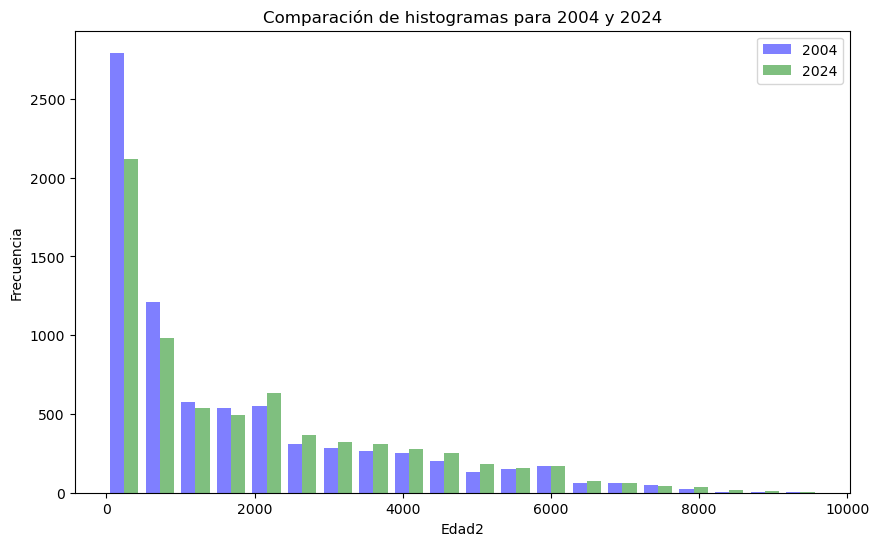

In [201]:
edad_2004 = edad2[edad2['año'] == 2004.0]['edad2']
edad_2024 = edad2[edad2['año'] == 2024.0]['edad2']

plt.figure(figsize=(10,6))
plt.hist([edad_2004, edad_2024],bins=20, alpha=0.5, color=['blue', 'green'], label=['2004', '2024'])
plt.xlabel('Edad2')
plt.ylabel('Frecuencia')
plt.title('Comparación de histogramas para 2004 y 2024')
plt.legend()
plt.show()
#no tiene mucho sentido gráficar las edades al cuadrado, aparte de que es poco entendible a simple vista

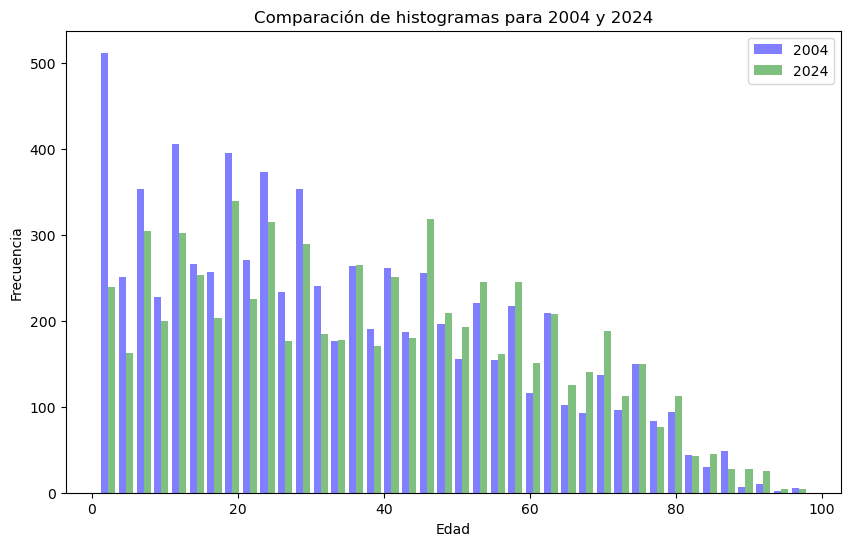

In [202]:
edad_2004 = np.sqrt(edad2[edad2['año'] == 2004.0]['edad2'])
edad_2024 = np.sqrt(edad2[edad2['año'] == 2024.0]['edad2']) #np.sqrt nos da la raiz cuadrada de la columna edad

plt.figure(figsize=(10,6))
plt.hist([edad_2004, edad_2024],bins=40, alpha=0.5, color=['blue', 'green'], label=['2004', '2024'])
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Comparación de histogramas para 2004 y 2024')
plt.legend()
plt.show()

In [203]:
from sklearn.neighbors import KernelDensity

In [204]:
df2004 = df

In [205]:
df2004estado = df2004[["ano4","estado","ch06"]]

In [206]:
valores_permitidos = ['Ocupado', 'Desocupado']  # los valores que querés conservar

df2004estado = df2004estado[df2004estado['estado'].isin(valores_permitidos)]

In [207]:
df2004estado = df2004estado.rename(columns={"ano4":"año","ch06":"edad"})

In [208]:
for col in df2004estado.columns:
    print(f"{col}:")
    print(df2004estado[col].unique())
    print("-" * 40)

año:
[2004.]
----------------------------------------
estado:
['Ocupado', 'Desocupado']
Categories (5, object): ['Entrevista individual no realizada (no respue... < 'Ocupado' < 'Desocupado' < 'Inactivo' < 'Menor de 10 años']
----------------------------------------
edad:
[67.0, 54.0, 25.0, 20.0, 55.0, ..., 10.0, 12.0, 81.0, 84.0, 79.0]
Length: 75
Categories (99, object): ['Menos de 1 año' < 1.0 < 2.0 < 3.0 ... 95.0 < 96.0 < 97.0 < '98 y más años']
----------------------------------------


In [209]:
df2004estado["edad"] = df2004estado["edad"].astype(str).replace({"Menos de 1 año": "1", "98 y más años": "98"})
df2004estado["edad"] = df2004estado["edad"].astype(float)

In [210]:
df2004estado["estado"] = df2004estado["estado"].astype(str).replace({"Ocupado": "1", "Desocupado": "2"})
df2004estado["estado"] = df2004estado["estado"].astype(float)

In [211]:
df2004estado

,año,estado,edad
1,2004.0,1.0,67.0
3,2004.0,1.0,54.0
5,2004.0,1.0,25.0
6,2004.0,1.0,20.0
7,2004.0,1.0,55.0
...,...,...,...
7638,2004.0,2.0,19.0
7640,2004.0,1.0,31.0
7643,2004.0,1.0,51.0
7644,2004.0,1.0,55.0


In [250]:
df2024estado=df2024[["ANO4","ESTADO","CH06"]]

In [252]:
df2024estado
valores_permitidos = [1,2]

df2024estado = df2024estado[df2024estado['ESTADO'].isin(valores_permitidos)]

In [254]:
df2024estado = df2024estado.rename(columns={"ESTADO": "estado","ANO4":"año","CH06":"edad"})

In [256]:
PanelB = pd.concat([df2004estado, df2024estado])
PanelB

,año,estado,edad
1,2004.0,1.0,67.0
3,2004.0,1.0,54.0
5,2004.0,1.0,25.0
6,2004.0,1.0,20.0
7,2004.0,1.0,55.0
...,...,...,...
46040,2024.0,1.0,34.0
46042,2024.0,2.0,63.0
46043,2024.0,1.0,33.0
46044,2024.0,1.0,33.0


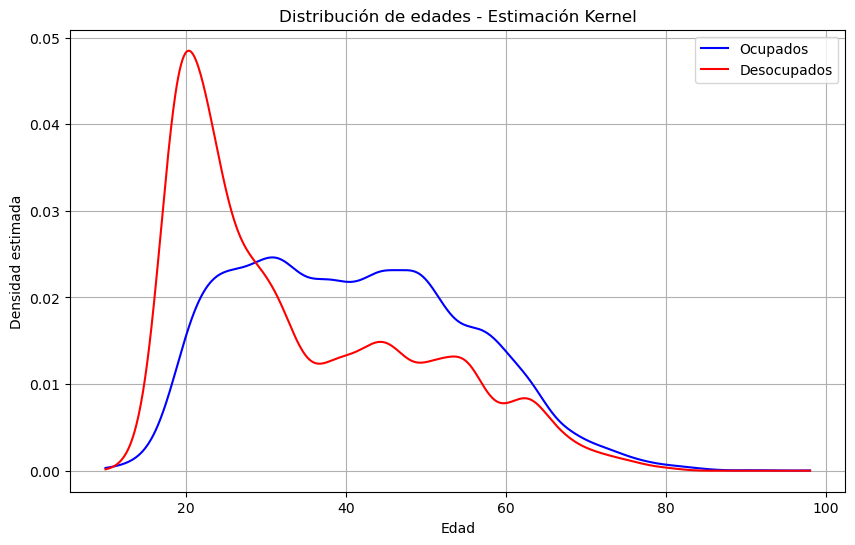

In [258]:
ocupados = PanelB[PanelB['estado'] == 1]['edad'].dropna().values.reshape(-1, 1)
desocupados = PanelB[PanelB['estado'] == 2]['edad'].dropna().values.reshape(-1, 1)

x_range = np.linspace(PanelB['edad'].min(), PanelB['edad'].max(), 1000).reshape(-1, 1)


kde_ocup = KernelDensity(kernel='gaussian', bandwidth=2).fit(ocupados)
dens_ocup = np.exp(kde_ocup.score_samples(x_range))

kde_desocup = KernelDensity(kernel='gaussian', bandwidth=2).fit(desocupados)
dens_desocup = np.exp(kde_desocup.score_samples(x_range))

plt.figure(figsize=(10, 6))
plt.plot(x_range[:, 0], dens_ocup, color='blue', label='Ocupados')
plt.plot(x_range[:, 0], dens_desocup, color='red', label='Desocupados')
plt.title('Distribución de edades - Estimación Kernel')
plt.xlabel('Edad')
plt.ylabel('Densidad estimada')
plt.legend()
plt.grid(True)
plt.show()
#Podemos ver que el gráfico nos muestra una mayor distribución de desocupados entre los 20 y 25.

In [260]:
print ("La distribución de edades muestra que los desocupados (línea roja) tienden a concentrarse en edades más jóvenes, con un pico notable alrededor de los 21 años. En cambio, los ocupados (línea azul) presentan una distribución más uniforme, con una mayor concentración entre los 30 y 50 años. Esto sugiere que los jóvenes enfrentan mayores dificultades para integrarse al mercado laboral")

La distribución de edades muestra que los desocupados (línea roja) tienden a concentrarse en edades más jóvenes, con un pico notable alrededor de los 21 años. En cambio, los ocupados (línea azul) presentan una distribución más uniforme, con una mayor concentración entre los 30 y 50 años. Esto sugiere que los jóvenes enfrentan mayores dificultades para integrarse al mercado laboral


In [422]:
educ2004=df[["ano4","ch12","ch13","ch14"]]
educ2004 = educ2004

In [424]:
print(educ2004)

        ano4           ch12 ch13 ch14
0     2004.0     Secundario   No   03
1     2004.0       Primario   Sí     
2     2004.0       Primario   Sí     
3     2004.0       Primario   Sí     
4     2004.0  Universitario   Sí     
...      ...            ...  ...  ...
7642  2004.0            0.0  0.0     
7643  2004.0       Primario   Sí     
7644  2004.0       Primario   Sí     
7645  2004.0            EGB   No   06
7646  2004.0     Secundario   Sí     

[7647 rows x 4 columns]


In [426]:
educ2004

,ano4,ch12,ch13,ch14
0,2004.0,Secundario,No,03
1,2004.0,Primario,Sí,
2,2004.0,Primario,Sí,
3,2004.0,Primario,Sí,
4,2004.0,Universitario,Sí,
...,...,...,...,...
7642,2004.0,0.0,0.0,
7643,2004.0,Primario,Sí,
7644,2004.0,Primario,Sí,
7645,2004.0,EGB,No,06


In [428]:
educ2004 = educ2004.rename(columns={"ano4":"año","ch12": "nivel de educacion","ch13":"finalizo","ch14":"educacion formal"})

In [438]:
educ2004 = educ2004[~(educ2004 == 0.0).any(axis=1)]
educ2004
pd.set_option('future.no_silent_downcasting', False)

In [440]:
for col in educ2004.columns:
    print(f"{col}:")
    print(educ2004[col].unique().tolist())
    print("-" * 40)

año:
[2004.0]
----------------------------------------
nivel de educacion:
[4, 7, 6, 2, 1, 5, 3, 8, 9]
----------------------------------------
finalizo:
['No']
----------------------------------------
educacion formal:
['03', '04', '02', '01', '06', '00', '05', '07', '09', '99', '08', '98']
----------------------------------------


In [442]:
#Eliminar filas con espacio en blanco en esa columna
educ2004 = educ2004[educ2004['educacion formal'].str.strip() != '']


In [444]:
educ2004['nivel de educacion'] = educ2004['nivel de educacion'].astype(str).replace({"Ns./Nr.": 0,'Jardín/Preescolar': 1, 'Primario': 2, 'EGB': 3, 'Secundario': 4, 'Polimodal': 5, 'Terciario': 6, 'Universitario': 7, 'Posgrado Universitario': 8, 'Educación especial (discapacitado)': 9}).astype(int)

educ2004

,año,nivel de educacion,finalizo,educacion formal
0,2004.0,4,No,03
5,2004.0,7,No,04
6,2004.0,6,No,02
9,2004.0,4,No,03
10,2004.0,4,No,02
...,...,...,...,...
7633,2004.0,1,No,00
7636,2004.0,3,No,07
7638,2004.0,3,No,09
7639,2004.0,3,No,00


In [448]:
import pandas as pd
pd.set_option('future.no_silent_downcasting', False)
#es para desactivar los warnings

In [450]:
#Ahora pasamos a números también la columna de finalizó
educ2004['finalizo'] = educ2004['finalizo'].astype(str).replace({'Sí': 1, 'No': 2, 'Ns./Nr.': 3}).astype(int)


In [452]:
# Convertir strings a enteros primero, para eliminar ceros a la izquierda
educ2004['educacion formal'] = educ2004['educacion formal'].astype(int).astype(float)
educ2004

,año,nivel de educacion,finalizo,educacion formal
0,2004.0,4,2,3.0
5,2004.0,7,2,4.0
6,2004.0,6,2,2.0
9,2004.0,4,2,3.0
10,2004.0,4,2,2.0
...,...,...,...,...
7633,2004.0,1,2,0.0
7636,2004.0,3,2,7.0
7638,2004.0,3,2,9.0
7639,2004.0,3,2,0.0


In [454]:
# Estadísticas completas para cada columna
estadisticas_completas = educ2004.describe(percentiles=[0.5])  # Incluye mediana (p50)
print(estadisticas_completas) 

          año  nivel de educacion  finalizo  educacion formal
count  3832.0         3832.000000    3832.0       3832.000000
mean   2004.0            3.753132       2.0          4.328027
std       0.0            1.806082       0.0         12.319283
min    2004.0            1.000000       2.0          0.000000
50%    2004.0            4.000000       2.0          3.000000
max    2004.0            9.000000       2.0         99.000000


In [470]:
educ2024=df2024[["ANO4","CH12","CH13","CH14"]]
educ2024 = educ2024.rename(columns={"ANO4":"año","CH12": "nivel de educacion","CH13":"finalizo","CH14":"educacion formal"})
educ2024 = educ2024.dropna()

In [478]:
educ=pd.concat([educ2004,educ2024])
educ.describe().round(2)

,año,nivel de educacion,finalizo,educacion formal
count,7197.00,7197.00,7197.00,7197.00
mean,2013.35,4.18,2.02,5.63
std,9.98,5.11,0.37,17.04
min,2004.00,1.00,2.00,0.00
25%,2004.00,2.00,2.00,1.00
50%,2004.00,4.00,2.00,2.00
75%,2024.00,5.00,2.00,4.00
max,2024.00,99.00,9.00,99.00


In [484]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dfp21=df

# Teniendo en cuenta un factor de inflacion aproximadamente de 35. Estamos multiplicando por 35 como aproximación del poder adquisitivo a precios de 2024
dfp21['p21_ajustado'] = dfp21['p21'] 
dfp21['salario_semanal'] = (dfp21['p21_ajustado'] * 35) / 40


#Aca lo que hicimos fue sacar los ceros, los valores que no nos interesaban.
df_salario = dfp21[dfp21['salario_semanal'] > 0] 
print (df_salario[["p21", "salario_semanal"]])

         p21  salario_semanal
3     2000.0         1750.000
5       30.0           26.250
6      100.0           87.500
7      800.0          700.000
12     750.0          656.250
...      ...              ...
7637   150.0          131.250
7640  1500.0         1312.500
7643   125.0          109.375
7644   125.0          109.375
7646   150.0          131.250

[2822 rows x 2 columns]


C:\Users\Juan T\AppData\Local\Temp\ipykernel_17588\1363160334.py:20: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


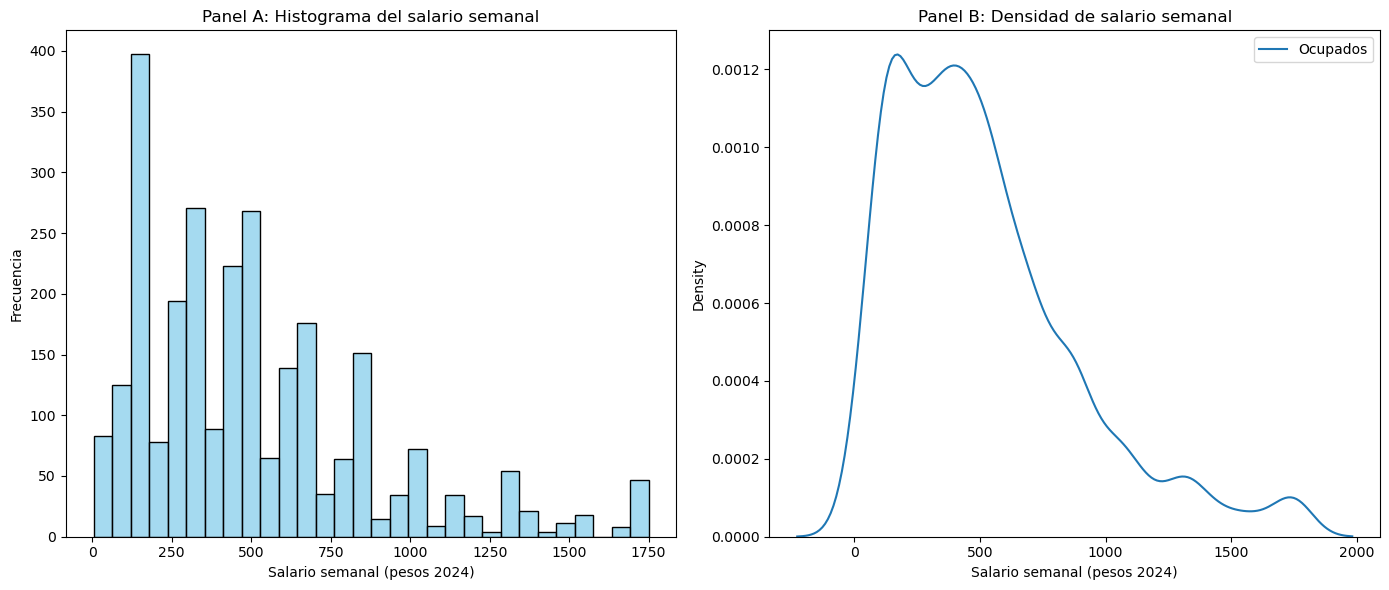

In [486]:
import seaborn as sns
import matplotlib.pyplot as plt

max_salario = df_salario["salario_semanal"].quantile(0.95)
df_filtrado = df_salario[df_salario["salario_semanal"] <= max_salario]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(df_filtrado["salario_semanal"], bins=30, kde=False, ax=axes[0], color="skyblue")
axes[0].set_title("Panel A: Histograma del salario semanal")
axes[0].set_xlabel("Salario semanal (pesos 2024)")
axes[0].set_ylabel("Frecuencia")

sns.kdeplot(
    data=df_filtrado[df_filtrado["estado"] == "Ocupado"],
    x="salario_semanal",
    label="Ocupados",
    ax=axes[1]
)
sns.kdeplot(
    data=df_filtrado[df_filtrado["estado"] == "Desocupado"],
    x="salario_semanal",
    label="Desocupados",
    ax=axes[1]
)
axes[1].set_title("Panel B: Densidad de salario semanal")
axes[1].set_xlabel("Salario semanal (pesos 2024)")
axes[1].legend()

plt.tight_layout()
plt.show()


In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm 

import seaborn as sns
from sklearn.neighbors import KernelDensity

In [492]:
dfhorastrab=df
horastrab = ['pp3e_tot', 'pp3f_tot']
dfhorastrab['horastrab'] = dfhorastrab['pp3e_tot'] + dfhorastrab['pp3f_tot']
cuantas = (dfhorastrab["horastrab"].isna()).shape[0]
print(cuantas)

7647


In [510]:
horastrab2004=dfhorastrab[dfhorastrab['horastrab']<120] #Consideramos 120 horas lo máximo posible que puede llegar a trabajar una persona en una semana
#Durmiendo 6 horas y trabajando 17 horas por día
horastrab2004 = horastrab2004.rename(columns={"ano4":"año"})
horastrab2004=horastrab2004[["año","horastrab"]]

In [520]:
dfhorastrab2024=df2024
dfhorastrab2024['horastrab'] = dfhorastrab2024['PP3E_TOT'] + dfhorastrab2024['PP3F_TOT']
cuantas = (dfhorastrab2024["horastrab"].isna()).shape[0]
print(cuantas)

7051


C:\Users\Juan T\AppData\Local\Temp\ipykernel_17588\3824546169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfhorastrab2024['horastrab'] = dfhorastrab2024['PP3E_TOT'] + dfhorastrab2024['PP3F_TOT']


In [528]:
dfhorastrab2024=dfhorastrab2024[["ANO4","horastrab"]]
dfhorastrab2024 = dfhorastrab2024.dropna()
dfhorastrab2024 = dfhorastrab2024.rename(columns={"ANO4":"año"})
dfhorastrab2024

,año,horastrab
245,2024,45.0
246,2024,42.0
247,2024,45.0
255,2024,60.0
271,2024,6.0
...,...,...
46036,2024,40.0
46040,2024,30.0
46043,2024,45.0
46044,2024,24.0


In [155]:
print(horastrab.describe()) 
print("Mediana (p50):", horastrab.median())  


          horastrab
count  45236.000000
mean      14.104165
std       22.895155
min        0.000000
25%        0.000000
50%        0.000000
75%       26.000000
max      119.000000
Mediana (p50): horastrab    0.0
dtype: float64


In [157]:
#Resumimos 
print("Promedio:", horastrab.mean())
print("Desviación estándar:", horastrab.std())
print("Mínimo:", horastrab.min())
print("Mediana (p50):", horastrab.median())
print("Máximo:", horastrab.max())


Promedio: horastrab    14.104165
dtype: float64
Desviación estándar: horastrab    22.895155
dtype: float64
Mínimo: horastrab    0.0
dtype: float64
Mediana (p50): horastrab    0.0
dtype: float64
Máximo: horastrab    119.0
dtype: float64


In [158]:
print("El promedio es de 14 horas trabajadas a la semana, la desviación es de 22 horas por lo que vemos que hay grandes diferencias en las horas que se trabajan, el mínimo y la mediana son 0 porque el 50% de la muestra no trabaja ni una sola hora. El máximo de horas trabajadas es de 119, creemos que un número más alto que eso es irreal e imposible.")

El promedio es de 14 horas trabajadas a la semana, la desviación es de 22 horas por lo que vemos que hay grandes diferencias en las horas que se trabajan, el mínimo y la mediana son 0 porque el 50% de la muestra no trabaja ni una sola hora. El máximo de horas trabajadas es de 119, creemos que un número más alto que eso es irreal e imposible.


In [161]:
!pip install openpyxl 

In [162]:
##### Punto 5

In [163]:
A2024 = pd.read_excel("usu_individual_T124.xlsx")
A2004 = pd.read_stata("Individual_t104.dta")

In [164]:
obs2024=A2024[["ANO4"]] #Tomamos la variable de los años para medir la cantidad de observaciones porque sabemos que no falta ni un solo valor
obs2004=A2004[["ano4"]]

In [165]:
obs2004 = obs2004.rename(columns={"ano4": "año"})
obs2024 = obs2024.rename(columns={"ANO4":"año"})

In [166]:
obs2004.shape #Hay 45289 observaciones en 2004

(45289, 1)

In [167]:
obs2024.shape #Hay 46050 observaciones en 2024

(46050, 1)

In [168]:
obstot = pd.concat([obs2004, obs2024])
obstot.shape #Hay 91339 observaciones sumando 2004 y 2024

(91339, 1)

In [169]:
Estado2004 = A2004[["estado"]]
Estado2024 = A2024[["ESTADO"]]
Estado2024 = Estado2024.rename(columns={"ESTADO":"Estado"})
Estado2004 = Estado2004.rename(columns={"estado":"Estado"})

In [170]:
for col in Estado2004.columns:
    print(f"{col}:")
    print(Estado2004[col].unique().tolist())
    print("-" * 40)

Estado:
['Inactivo', 'Ocupado', 'Desocupado', 'Menor de 10 años', 'Entrevista individual no realizada (no respuesta al cuestion']
----------------------------------------


In [171]:
Estado2004 = Estado2004[Estado2004["Estado"]=="Entrevista individual no realizada (no respuesta al cuestion"]
Estado2004.shape #Intentamos buscar los NAN pero descubrimos que no usan Nan para este caso
#Por lo que decidimos tener en cuenta solo esos valores, de forma que nos arroja la cantidad de Nan que habría.
#En este caso 35 en 2004

(35, 1)

In [172]:
for col in Estado2024.columns:
    print(f"{col}:")
    print(Estado2024[col].unique().tolist())
    print("-" * 40) #Vemos que en este caso es númerica

Estado:
[1, 3, 4, 2, 0]
----------------------------------------


In [173]:
Estado2024 = Estado2024[Estado2024["Estado"]==0]
Estado2024.shape #Hay 81 Nan en 2024, más que en 2004.

(81, 1)

In [174]:
Estado2004["Estado"] = Estado2004["Estado"].astype(str).replace({"Entrevista individual no realizada (no respuesta al cuestion": "0"})
Estado2004["Estado"] = Estado2004["Estado"].astype(float)
#Convierto los Nan de 2004 en 0 para que sean iguales a los de 2024, de forma que será más fácil unirlos.

In [175]:
EstadoNantot = pd.concat([Estado2004, Estado2024])
EstadoNantot.shape #En total, en 2004 y 2024 hay 116 valores faltantes, es decir gente que no reportó su condición de actividad

(116, 1)

In [176]:
Ocupados2004 =A2004[A2004["estado"]=="Ocupado"]
Ocupados2004 = Ocupados2004[["estado"]]
Ocupados2024 = A2024[A2024["ESTADO"]==1]
Ocupados2024 = Ocupados2024[["ESTADO"]]

In [177]:
Ocupados2004.shape #Se reportaron 17022 ocupados en 2004

(17022, 1)

In [178]:
Ocupados2024.shape #Se reportaron 20325 ocupados en 2024

(20325, 1)

In [179]:
Ocupados2024 = Ocupados2024.rename(columns={"ESTADO":"Estado"})
Ocupados2004 = Ocupados2004.rename(columns={"estado":"Estado"})

In [180]:
Ocupados2004["Estado"] = Ocupados2004["Estado"].astype(str).replace({"Ocupado": "1"})
Ocupados2004["Estado"] = Ocupados2004["Estado"].astype(float)

In [181]:
Ocupadostot = pd.concat([Ocupados2004, Ocupados2024])
Ocupadostot.shape #En total contando los ocupados de 2004 y 2024 hay 37347 ocupados

(37347, 1)

In [182]:
Desocupados2004 =A2004[A2004["estado"]=="Desocupado"]
Desocupados2004 = Desocupados2004[["estado"]]
Desocupados2024 = A2024[A2024["ESTADO"]==2]
Desocupados2024 = Desocupados2024[["ESTADO"]]

In [183]:
Desocupados2004.shape

(2717, 1)

In [184]:
Desocupados2024.shape

(1362, 1)

In [185]:
Desocupados2024 = Desocupados2024.rename(columns={"ESTADO":"Estado"})
Desocupados2004 = Desocupados2004.rename(columns={"estado":"Estado"})

In [186]:
Desocupados2004["Estado"] = Desocupados2004["Estado"].astype(str).replace({"Desocupado": "2"})
Desocupados2004["Estado"] = Desocupados2004["Estado"].astype(float)

In [187]:
Desocupadostot = pd.concat([Desocupados2004, Desocupados2024])
Desocupadostot.shape

(4079, 1)

In [188]:
MercadoLaboral = A2004 [["estado","ipcf","nivel_ed","pp02c1","pp02c2","pp02c4","pp10e","pp10d","pp10c","pp10a"]]
MercadoLaboral = MercadoLaboral[MercadoLaboral["estado"]=="Desocupado"]
Merclabdes = MercadoLaboral
Merclabdes = MercadoLaboral[["ipcf","nivel_ed","pp02c1","pp02c2","pp02c4","pp10e","pp10d","pp10c","pp10a"]]
Merclabdes

,ipcf,nivel_ed,pp02c1,pp02c2,pp02c4,pp10e,pp10d,pp10c,pp10a
8,208.000000,Secundaria Completa,No,Sí,No,...más de 3 años?,Sí,No,...más de 1 año?
14,150.000000,Superior Universitaria Completa,No,Sí,No,...más de 1 a 3 años?,Sí,No,...más de 1 año?
19,1035.000000,Superior Universitaria Completa,No,No,No,...más de 3 a 6 meses?,Sí,No,...más de 6 a 12 meses?
24,1438.750000,Secundaria Completa,No,Sí,No,...de 1 a 3 meses?,0.0,Sí,...de 1 a 3 meses?
33,180.000000,Secundaria Incompleta,No,No,No,...de 1 a 3 meses?,0.0,Sí,...de 1 a 3 meses?
...,...,...,...,...,...,...,...,...,...
45144,420.000000,Superior Universitaria Incompleta,Sí,Sí,No,0.0,No,No,...más de 1 año?
45163,275.000000,Primaria Completa,No,No,No,...más de 3 años?,Sí,No,...más de 1 año?
45196,660.000000,Secundaria Completa,0.0,0.0,0.0,...menos de 1 mes?,0.0,Sí,...más de 6 a 12 meses?
45257,138.333333,Secundaria Incompleta,Sí,Sí,No,...más de 6 a 12 meses?,0.0,Sí,...más de 1 año?


In [189]:
Merclabdes = Merclabdes[~(Merclabdes == 0.0).any(axis=1)]

In [ ]:
Merclabdes = Merclabdes.rename(columns={"pp02c1":"Hizo contactos, entrevistas","pp02c2":"Mandó currículum, puso / contestó avisos","pp02c4":"Hizo algo para ponerse por su cuenta","pp10e":"¿Cuánto tiempo hace que terminó su último trabajo / changa...? ","pp10d":"¿Ha trabajado alguna vez? ","pp10c":"¿Ha trabajado alguna vez?","pp10a":"¿Cuánto tiempo hace que terminó su último trabajo / changa...?"})
Merclabdes2004 = Merclabdes 

In [ ]:
MercadoLaboral2024 = A2024[["ESTADO","IPCF","NIVEL_ED","PP02C1","PP02C2","PP02C4","PP10E","PP10D"]]
MercadoLaboral2024 = MercadoLaboral2024[MercadoLaboral2024["ESTADO"]==2]
Merclabdes2024 = MercadoLaboral2024
Merclabdes2024 = MercadoLaboral2024[["IPCF","NIVEL_ED","PP02C1","PP02C2","PP02C4","PP10E","PP10D"]]

In [ ]:
Merclabdes2024 = Merclabdes2024.rename(columns={"IPCF":"ipcf","NIVEL_ED":"nivel_ed","PP02C1":"Hizo contactos, entrevistas","PP02C2":"Mandó currículum, puso / contestó avisos","PP02C4":"Hizo algo para ponerse por su cuenta","PP10E":"¿Cuánto tiempo hace que terminó su último trabajo / changa...? ","PP10D":"¿Ha trabajado alguna vez?",})

In [ ]:
Merclabdes2004["nivel_ed"] = Merclabdes2004["nivel_ed"].astype(str).replace({
    "Primaria Incompleta (incluye educación especial)": "1",
    "Primaria Completa": "2",
    "Secundaria Incompleta": "3",
    "Secundaria Completa": "4",
    "Superior Universitaria Incompleta": "5",
    "Superior Universitaria Completa": "6",
    "Sin instrucción": "7",
    "Ns./Nr.": "9"
})
Merclabdes2004["nivel_ed"] = Merclabdes2004["nivel_ed"].astype(float)
Merclabdes2004["Hizo contactos, entrevistas"] = Merclabdes2004["Hizo contactos, entrevistas"].astype(str).replace({"Sí":"1","No":"2"})
Merclabdes2004["Hizo contactos, entrevistas"] = Merclabdes2004["Hizo contactos, entrevistas"].astype(float) 
Merclabdes2004["Mandó currículum, puso / contestó avisos"] = Merclabdes2004["Mandó currículum, puso / contestó avisos"].astype(str).replace({"Sí":"1","No":"2"})
Merclabdes2004["Mandó currículum, puso / contestó avisos"] = Merclabdes2004["Mandó currículum, puso / contestó avisos"].astype(float)

Merclabdes2004["Hizo algo para ponerse por su cuenta"] = Merclabdes2004["Hizo algo para ponerse por su cuenta"].astype(str).replace({"Sí":"1","No":"2"})
Merclabdes2004["Hizo algo para ponerse por su cuenta"] = Merclabdes2004["Hizo algo para ponerse por su cuenta"].astype(float)

Merclabdes2004["¿Cuánto tiempo hace que terminó su último trabajo / changa...?"] = Merclabdes2004["¿Cuánto tiempo hace que terminó su último trabajo / changa...?"].astype(str).replace({"...menos de 1 mes?":"1","...de 1 a 3 meses?":"2","...más de 3 a 6 meses?":"3","...más de 6 a 12 meses?":"4","Menos de 1 año":"4","...más de 1 año?":"5","...más de 1 a 3 años?":"5","...más de 3 años?":"6","Ns./Nr.":"9"})
Merclabdes2004["¿Cuánto tiempo hace que terminó su último trabajo / changa...?"] = Merclabdes2004["¿Cuánto tiempo hace que terminó su último trabajo / changa...?"].astype(float)

Merclabdes2004["¿Ha trabajado alguna vez?"] = Merclabdes2004["¿Ha trabajado alguna vez?"].astype(str).replace({"Sí":"1","No":"2","Ns./Nr.":"0"})
Merclabdes2004["¿Ha trabajado alguna vez?"] = Merclabdes2004["¿Ha trabajado alguna vez?"].astype(float)


In [ ]:
Merclabdes2024= Merclabdes2024[["ipcf","nivel_ed","Hizo contactos, entrevistas","Mandó currículum, puso / contestó avisos","¿Ha trabajado alguna vez?"]]
Merclabdes2024.shape

In [ ]:
Merclabdes2004 = Merclabdes2004[["ipcf","nivel_ed","Hizo contactos, entrevistas","Mandó currículum, puso / contestó avisos","¿Ha trabajado alguna vez?"]]
Merclabdes2004.shape

In [ ]:
Merclabdestot = pd.concat([Merclabdes2004, Merclabdes2024])
Merclabdestot =Merclabdestot[["ipcf","nivel_ed","Hizo contactos, entrevistas","Mandó currículum, puso / contestó avisos","¿Ha trabajado alguna vez?"]]
Merclabdestot.shape

In [ ]:
import pandas as pd
df = pd.read_stata('Individual_t104.dta')
print(df.columns)


In [ ]:
df_horastrab = horastrab[['horastrab']].copy()
print(type(df_horastrab))
df_horastrab.head()


In [ ]:
df_salario["salario_semanal"]
df_salario = df_salario["salario_semanal"].to_frame()
df_salario = df_salario["salario_semanal"].to_frame(name='salario_semanal')

In [ ]:
df_salario

In [ ]:
df_edad2educ = pd.concat([edad2, educ], axis=1).dropna()
df_edad2educ

In [ ]:
df_horassalario =pd.concat([df_salario, df_horastrab], axis=1).dropna()
df_horassalario 

In [ ]:
df_unido = pd.concat([df_edad2educ.reset_index(drop=True), df_horassalario.reset_index(drop=True)], axis=1).dropna()
df_unido

In [ ]:
edad =df2004[["ch06"]]
edad = edad.rename(columns={"ch06": "edad"})
edad

In [ ]:
dffinal=pd.concat([edad.reset_index(drop=True), df_unido.reset_index(drop=True)], axis=1).dropna()
dffinal=dffinal[["edad","edad2","nivel de educacion","finalizo","educacion formal","salario_semanal","horastrab"]]
dffinal

In [ ]:
dffinal['edad'] = pd.to_numeric(dffinal['edad'], errors='coerce')  # convierte a float; pone NaN donde falla
dffinal = dffinal.dropna(subset=['edad'])

In [ ]:
numericos = dffinal[["edad","edad2","nivel de educacion","finalizo","educacion formal","salario_semanal","horastrab"]]
sns.heatmap(numericos.corr(), annot=True, cmap="vlag", vmin=-1, vmax=1)
plt.title("Matriz de correlación entre variables numéricas 2024")
plt.show()

In [ ]:
dffinal1.columns

In [ ]:
dffinal1["nivel de educacion"] = dffinal1["nivel de educacion"].astype(str).replace({
    "Primaria Incompleta (incluye educación especial)": "1",
    "Primaria Completa": "2",
    "Secundario": "3",
    "Secundaria Completa": "4",
    "Superior Universitaria Incompleta": "5",
    "Superior Universitaria Completa": "6",
    "Sin instrucción": "7",
    "Ns./Nr.": "9"
})
dffinal1["nivel de educacion"] = dffinal1["nivel de educacion"].astype(float)

In [ ]:
dffinal1